<a href="https://colab.research.google.com/github/yunus-cpu/Brain_Tumor_Detection/blob/main/Brain_Tumor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOV8 Görüntü Sınıflandırma

##Ortam Hazırlığı

In [ ]:
#Drive'a bağlanma
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%pwd

'/content'

In [ ]:
%cd /content/drive/MyDrive/YOLOV8/4_keypoint_detection/5_BrainTumor_classification

/content/drive/MyDrive/YOLOV8/4_keypoint_detection/5_BrainTumor_classification


In [ ]:
#Ultralyticsi indir
%pip install ultralytics

import ultralytics

ultralytics.checks()

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.3/112.6 GB disk)


## Eğitim/Training

In [ ]:
#Dosyaları ayıkla
!unzip data/BrainTumor_classification.zip -d./data



Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: ./data/BrainTumor_classification/train/meningioma/Te-me_0050.jpg  
  inflating: ./data/BrainTumor_classification/train/meningioma/Te-me_0051.jpg  
  inflating: ./data/BrainTumor_classification/train/meningioma/Te-me_0053.jpg  
  inflating: ./data/BrainTumor_classification/train/meningioma/Te-me_0055.jpg  
  inflating: ./data/BrainTumor_classification/train/meningioma/Te-me_0056.jpg  
  inflating: ./data/BrainTumor_classification/train/meningioma/Te-me_0057.jpg  
  inflating: ./data/BrainTumor_classification/train/meningioma/Te-me_0058.jpg  
  inflating: ./data/BrainTumor_classification/train/meningioma/Te-me_0059.jpg  
  inflating: ./data/BrainTumor_classification/train/meningioma/Te-me_0060.jpg  
  inflating: ./data/BrainTumor_classification/train/meningioma/Te-me_0061.jpg  
  inflating: ./data/BrainTumor_classification/train/meningioma/Te-me_0062.jpg  
  inflating: ./data/BrainTumor_classification/train/meningioma/Te-me_0063

In [ ]:
!yolo classify train \
  model=yolov8l-cls.pt \
  data=/content/drive/MyDrive/YOLOV8/5_BrainTumor_classification/data/BrainTumor_classification \
  imgsz=224 \
  workers=4 \
  batch=32 \
  device=0 \
  epochs=25 \
  patience=5 \
  weight_decay=0.0005 \
  flipud=0.5 \
  fliplr=0.5 \
  hsv_h=0.015 \
  hsv_s=0.7 \
  hsv_v=0.4 \
  name="yolov8_classification_reg"

Ultralytics 8.3.89 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolov8l-cls.pt, data=/content/drive/MyDrive/YOLOV8/5_BrainTumor_classification/data/BrainTumor_classification, epochs=25, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=0, workers=4, project=None, name=yolov8_classification3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fal

## Eğitim yarıda kesilirse

In [ ]:
#EĞİTİM YARIDA KESİLİRSE
!yolo classify train model=runs/classify/yolov8_classifications7/weights/last.pt resume=True

In [ ]:
# 1. YÖNTEM Resim sınıflandırma
!yolo classify predict model=/content/drive/MyDrive/YOLOV8/5_BrainTumor_classification/runs/classify/yolov8_classification3/weights/best.pt source=/content/drive/MyDrive/YOLOV8/5_BrainTumor_classification/inference save=True

Ultralytics 8.3.89 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8l-cls summary (fused): 54 layers, 36,189,700 parameters, 0 gradients, 98.7 GFLOPs

image 1/41 /content/drive/MyDrive/YOLOV8/5_BrainTumor_classification/inference/Te-gl_0023.jpg: 224x224 glioma 1.00, notumor 0.00, meningioma 0.00, pituitary 0.00, 10.9ms
image 2/41 /content/drive/MyDrive/YOLOV8/5_BrainTumor_classification/inference/Te-gl_0047.jpg: 224x224 glioma 1.00, meningioma 0.00, pituitary 0.00, notumor 0.00, 10.9ms
image 3/41 /content/drive/MyDrive/YOLOV8/5_BrainTumor_classification/inference/Te-gl_0056.jpg: 224x224 glioma 1.00, meningioma 0.00, notumor 0.00, pituitary 0.00, 10.9ms
image 4/41 /content/drive/MyDrive/YOLOV8/5_BrainTumor_classification/inference/Te-gl_0066.jpg: 224x224 glioma 1.00, notumor 0.00, meningioma 0.00, pituitary 0.00, 10.9ms
image 5/41 /content/drive/MyDrive/YOLOV8/5_BrainTumor_classification/inference/Te-gl_0186.jpg: 224x224 glioma 1.00, pituitary 0.00, notumor 0.00, men


0: 224x224 meningioma 1.00, pituitary 0.00, glioma 0.00, notumor 0.00, 17.2ms
Speed: 7.9ms preprocess, 17.2ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


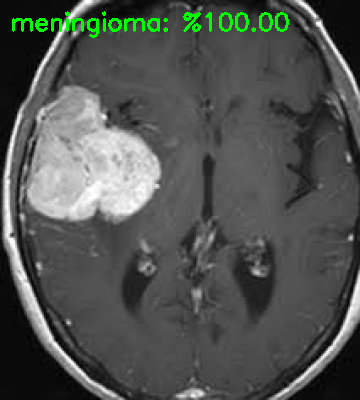

In [ ]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import imutils

# Model ve görsel yolu
img_path = "/content/drive/MyDrive/YOLOV8/4_keypoint_detection/5_BrainTumor_classification/inference/Tr-me_0281.jpg"
model_path = "/content/drive/MyDrive/YOLOV8/4_keypoint_detection/5_BrainTumor_classification/runs/classify/yolov8_classification_reg/weights/best.pt"

# Modeli yükle
model = YOLO(model_path)

# Görseli yükle ve boyutlandır
img = cv2.imread(img_path)
img = imutils.resize(img, width=360)

# Modeli çalıştır ve sonuçları al
results = model(img)[0]

# Sonuçları al
probs = results.probs.data.tolist()  # Sınıf olasılıklarını al
class_names = results.names  # Sınıf isimleri

# En yüksek olasılığa sahip sınıfı bul
max_prob_index = probs.index(max(probs))
predicted_class = class_names[max_prob_index]
confidence = probs[max_prob_index] * 100  # Yüzdelik hale getir

# Sonucu ekrana yazdır
text = f"{predicted_class}: %{confidence:.2f}"
cv2.putText(img, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# Görseli göster
cv2_imshow(img)


In [ ]:
from ultralytics import YOLO
import numpy as np
from sklearn.metrics import classification_report
import os
from glob import glob

# Eğitilmiş YOLOv8 sınıflandırma modelini yükle
model = YOLO("/content/drive/MyDrive/YOLOV8/5_BrainTumor_classification/runs/classify/yolov8_classification3/weights/best.pt")

# Sınıf isimleri (klasör adları aynı olmalı)
class_names = ["glioma", "meningioma", "notumor", "pituitary"]
base_path = "/content/drive/MyDrive/YOLOV8/5_BrainTumor_classification/data/BrainTumor_classification/test"

test_images = []
true_labels = []

# Her sınıf klasöründen tek tek tüm resimleri al
for label, class_name in enumerate(class_names):
    folder_path = os.path.join(base_path, class_name)
    image_paths = glob(os.path.join(folder_path, "*.jpg"))  # Eğer .png ise değiştir
    test_images.extend(image_paths)
    true_labels.extend([label] * len(image_paths))

# Tahmin yap
results = model(test_images)

# Tahmin edilen sınıflar
pred_labels = [res.probs.top1 for res in results]

# Sınıf isimlerine göre classification report
print(classification_report(true_labels, pred_labels, target_names=class_names))



0: 224x224 glioma 1.00, meningioma 0.00, notumor 0.00, pituitary 0.00, 2.8ms
1: 224x224 glioma 1.00, meningioma 0.00, notumor 0.00, pituitary 0.00, 2.8ms
2: 224x224 glioma 1.00, notumor 0.00, meningioma 0.00, pituitary 0.00, 2.8ms
3: 224x224 glioma 1.00, meningioma 0.00, pituitary 0.00, notumor 0.00, 2.8ms
4: 224x224 glioma 1.00, meningioma 0.00, notumor 0.00, pituitary 0.00, 2.8ms
5: 224x224 glioma 1.00, notumor 0.00, meningioma 0.00, pituitary 0.00, 2.8ms
6: 224x224 glioma 1.00, notumor 0.00, meningioma 0.00, pituitary 0.00, 2.8ms
7: 224x224 glioma 1.00, notumor 0.00, meningioma 0.00, pituitary 0.00, 2.8ms
8: 224x224 glioma 1.00, meningioma 0.00, notumor 0.00, pituitary 0.00, 2.8ms
9: 224x224 glioma 1.00, notumor 0.00, meningioma 0.00, pituitary 0.00, 2.8ms
10: 224x224 glioma 1.00, meningioma 0.00, pituitary 0.00, notumor 0.00, 2.8ms
11: 224x224 glioma 1.00, meningioma 0.00, pituitary 0.00, notumor 0.00, 2.8ms
12: 224x224 glioma 1.00, notumor 0.00, pituitary 0.00, meningioma 0.00, 2

In [ ]:
# Sınıflandırma raporunu yazdır
print("Classification Report:")
print(classification_report(true_labels, pred_labels))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       0.99      0.99      0.99       165
           2       1.00      1.00      1.00       200
           3       0.99      0.99      0.99       177

    accuracy                           0.99       705
   macro avg       0.99      0.99      0.99       705
weighted avg       0.99      0.99      0.99       705




0: 224x224 glioma 1.00, meningioma 0.00, notumor 0.00, pituitary 0.00, 2.8ms
1: 224x224 glioma 1.00, meningioma 0.00, notumor 0.00, pituitary 0.00, 2.8ms
2: 224x224 glioma 1.00, notumor 0.00, meningioma 0.00, pituitary 0.00, 2.8ms
3: 224x224 glioma 1.00, meningioma 0.00, pituitary 0.00, notumor 0.00, 2.8ms
4: 224x224 glioma 1.00, meningioma 0.00, notumor 0.00, pituitary 0.00, 2.8ms
5: 224x224 glioma 1.00, notumor 0.00, meningioma 0.00, pituitary 0.00, 2.8ms
6: 224x224 glioma 1.00, notumor 0.00, meningioma 0.00, pituitary 0.00, 2.8ms
7: 224x224 glioma 1.00, notumor 0.00, meningioma 0.00, pituitary 0.00, 2.8ms
8: 224x224 glioma 1.00, meningioma 0.00, notumor 0.00, pituitary 0.00, 2.8ms
9: 224x224 glioma 1.00, notumor 0.00, meningioma 0.00, pituitary 0.00, 2.8ms
10: 224x224 glioma 1.00, meningioma 0.00, pituitary 0.00, notumor 0.00, 2.8ms
11: 224x224 glioma 1.00, meningioma 0.00, pituitary 0.00, notumor 0.00, 2.8ms
12: 224x224 glioma 1.00, notumor 0.00, pituitary 0.00, meningioma 0.00, 2

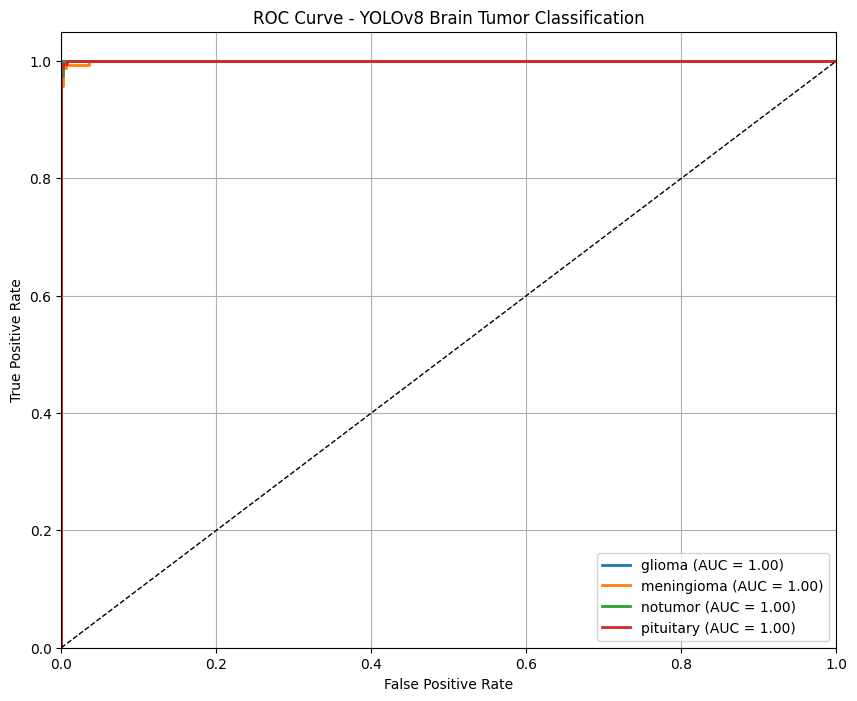

In [ ]:
from ultralytics import YOLO
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import os
from glob import glob

# Sınıf isimleri ve yol
class_names = ["glioma", "meningioma", "notumor", "pituitary"]
base_path = "/content/drive/MyDrive/YOLOV8/5_BrainTumor_classification/data/BrainTumor_classification/test"

# Modeli yükle
model = YOLO("/content/drive/MyDrive/YOLOV8/5_BrainTumor_classification/runs/classify/yolov8_classification3/weights/best.pt")

test_images = []
true_labels = []

# Görüntüleri ve etiketleri topla
for label, class_name in enumerate(class_names):
    folder_path = os.path.join(base_path, class_name)
    image_paths = glob(os.path.join(folder_path, "*.jpg"))
    test_images.extend(image_paths)
    true_labels.extend([label] * len(image_paths))

# Model tahminleri
results = model(test_images)

# Gerçek etiketleri one-hot vektörle (ROC için gerekli)
y_true = label_binarize(true_labels, classes=[0, 1, 2, 3])

# Tahmin olasılıklarını al (4 sınıf için 4 olasılık)
y_score = np.array([res.probs.data.tolist() for res in results])

# ROC Curve ve AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = len(class_names)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC eğrilerini çiz
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - YOLOv8 Brain Tumor Classification')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
!yolo classify val model=/content/drive/MyDrive/YOLOV8/7_Yolov11_tumor/runs/classify/yolov11_classification_reg/weights/best.pt data=/content/drive/MyDrive/YOLOV8/7_Yolov11_tumor/data/BrainTumor_classification


Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l-cls summary (fused): 94 layers, 12,823,556 parameters, 0 gradients, 49.3 GFLOPs
train: /content/drive/MyDrive/YOLOV8/7_Yolov11_tumor/data/BrainTumor_classification/train... found 5617 images in 4 classes ✅ 
val: /content/drive/MyDrive/YOLOV8/7_Yolov11_tumor/data/BrainTumor_classification/val... found 701 images in 4 classes ✅ 
test: /content/drive/MyDrive/YOLOV8/7_Yolov11_tumor/data/BrainTumor_classification/test... found 705 images in 4 classes ✅ 
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 2.1±3.8 MB/s, size: 20.1 KB)
val: Scanning /content/drive/MyDrive/YOLOV8/7_Yolov11_tumor/data/BrainTumor_classification/val... 701 images, 0 corrupt: 100% 701/701 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc:   5% 2/44 [00:05<01:29,  2.12s/it]Downloading https://ultralytics.com/assets/Arial.ttf to '/root/.config/Ultralytics/Arial.ttf'...

100% 755k/755k [00:00<00:00, 21.7MB/s]
         

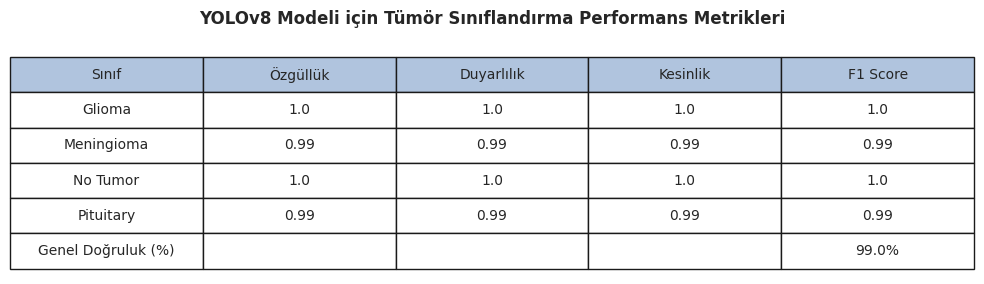

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# YOLOv8 veri tablosu
data = {
    "Sınıf": ["Glioma", "Meningioma", "No Tumor", "Pituitary", "Genel Doğruluk (%)"],
    "Özgüllük": [1.00, 0.99, 1.00, 0.99, ""],
    "Duyarlılık": [1.00, 0.99, 1.00, 0.99, ""],
    "Kesinlik": [1.00, 0.99, 1.00, 0.99, ""],
    "F1 Score": [1.00, 0.99, 1.00, 0.99, ""],
}

df = pd.DataFrame(data)
df.loc[4, "F1 Score"] = "99.0%"

# Görsel oluşturma
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('off')

table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='center',
    loc='center',
    colColours=["#B0C4DE"] * len(df.columns)
)

# Stil ayarları
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.2)  # hücre yüksekliği

# Başlık
plt.title("YOLOv8 Modeli için Tümör Sınıflandırma Performans Metrikleri", fontsize=12, weight='bold', pad=20)

plt.tight_layout()
plt.show()
